In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [19]:
# Training Data
x0=[3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,\
   7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
y0=[1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,\
   2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]
l0=[1,1,1,1,0,1,0,1,0,1,1,0,0,1,1,0,1]
# Testing Data
x1=[6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1]
y1=[1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03]
l1=[0, 1, 1, 0, 1, 1, 1, 1]

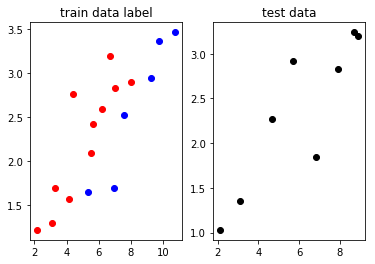

In [20]:
# data illustration
x0=np.asarray(x0)
y0=np.asarray(y0)
l0=np.asarray(l0)
pos_index=np.where(l0==1)
neg_index=np.where(l0==0)
plt.subplot(1, 2, 1)
plt.title('train data label')
plt.plot(x0[pos_index], y0[pos_index], 'ro')
plt.plot(x0[neg_index], y0[neg_index], 'bo')
plt.subplot(1,2,2)
plt.title('test data')
plt.plot(x1,y1,'ko')
plt.show()

In [21]:
# data process
X0 = np.array(x0, dtype = np.float32).reshape(len(x0), 1)
print(X0)
L0 = np.array(l0, dtype = np.float32).reshape(len(x0), 1)
print(L0)

[[ 3.3  ]
 [ 4.4  ]
 [ 5.5  ]
 [ 6.71 ]
 [ 6.93 ]
 [ 4.168]
 [ 9.779]
 [ 6.182]
 [ 7.59 ]
 [ 2.167]
 [ 7.042]
 [10.791]
 [ 5.313]
 [ 7.997]
 [ 5.654]
 [ 9.27 ]
 [ 3.1  ]]
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [37]:
# train process

# plot train result
#referring: np.where

# Graph Input
x_input=tf.placeholder(tf.float32,(None,1))
l_input=tf.placeholder(tf.float32,(None,1))

# Set model weights
w = tf.Variable(np.random.rand(1,1), dtype=tf.float32)
b = tf.Variable(np.random.rand(1,), dtype=tf.float32)

# Construct a logistic model
l_pred = tf.add(tf.matmul(x_input, w), b)

# Construct (Mean squared) loss
loss = tf.reduce_mean(tf.pow(l_pred-l_input, 2))

#Declare optimizer method
optim = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Create session, initial variables, feed data and print result
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())

    #start train model
    for epoch in range(training_epochs):
        pred_l, loss_, optim_ = sess.run([l_pred,loss,optim], feed_dict = {x_input:X0, l_input:L0})
        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            print("Epoch {:4d} cost: {:.9f}".format((epoch + 1), loss_))
            
    print("Optimization Finished!")
    final_w = np.squeeze(sess.run(w))
    final_b = np.squeeze(sess.run(b))
    print("Training modal w: {:.5f}, b: {:.5f}".format(final_w, final_b))

Epoch   50 cost: 0.174634099
Epoch  100 cost: 0.165627003
Epoch  150 cost: 0.158563450
Epoch  200 cost: 0.153024033
Epoch  250 cost: 0.148679882
Epoch  300 cost: 0.145273104
Epoch  350 cost: 0.142601460
Epoch  400 cost: 0.140506282
Epoch  450 cost: 0.138863191
Epoch  500 cost: 0.137574613
Epoch  550 cost: 0.136564106
Epoch  600 cost: 0.135771632
Epoch  650 cost: 0.135150135
Epoch  700 cost: 0.134662747
Epoch  750 cost: 0.134280562
Epoch  800 cost: 0.133980826
Epoch  850 cost: 0.133745775
Epoch  900 cost: 0.133561417
Epoch  950 cost: 0.133416846
Epoch 1000 cost: 0.133303493
Optimization Finished!
Training modal w: -0.12386, b: 1.41160


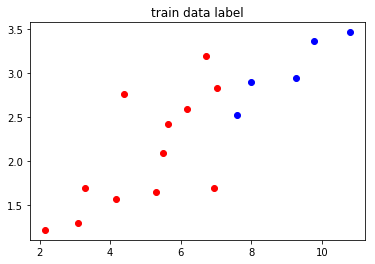

In [29]:
# display the fitting line
# plot the trained model point
pred_l0 = final_w * x0 + final_b
pos_index_ = np.where(pred_l0 > 0.5)
neg_index_ = np.where(pred_l0 <= 0.5)


#plt.subplot(1, 2, 1)
plt.title('train data label')
plt.plot(x0[pos_index_], y0[pos_index_], 'ro')
plt.plot(x0[neg_index_], y0[neg_index_], 'bo')

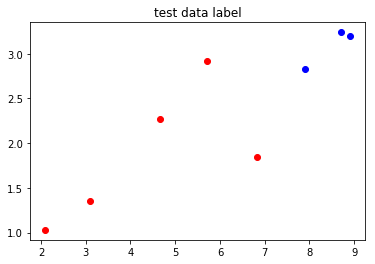

In [31]:
# test process
# plot test result
x1 = np.array(x1, dtype = np.float32).reshape(-1, 1)
y1 = np.array(y1, dtype = np.float32).reshape(-1, 1)
pred_l1 = final_w * x1 + final_b
pos_index_test = np.where(pred_l1 > 0.5)
neg_index_test = np.where(pred_l1 <= 0.5)

plt.title('test data label')
plt.plot(x1[pos_index_test], y1[pos_index_test], 'ro')
plt.plot(x1[neg_index_test], y1[neg_index_test], 'bo')
